In [7]:
import random
import numpy
import math
import time
from numpy import abs, zeros, log10, where, arctanh, tanh
from numpy.random import uniform, standard_cauchy

def SRA(objf, lb, ub, dim, PopSize, iters):

    
    if not isinstance(lb, list):
        lb = [lb] * dim
    if not isinstance(ub, list):
        ub = [ub] * dim
    lb = numpy.array(lb)
    ub = numpy.array(ub)
    
    L=0.5
    h=6.625*10**(-34)
    h2=h**2
    Cost=numpy.full(PopSize,float("inf")) #record the fitness of all slime mold
    pos = numpy.zeros((PopSize, dim))
    Psai =  numpy.zeros((PopSize, dim))
    for i in range(dim):
        pos[:, i] = numpy.random.uniform(0, 1, PopSize) * (ub[i] - lb[i]) + lb[i]
    
    for i in range(0,PopSize):
        for j in range(dim):
                pos[i, j] = numpy.clip(pos[i, j], lb[j], ub[j])
                Psai[i,j]=numpy.sin(pos[i,j])
        Cost[i] = objf(pos[i, :])

    SmellOrder = numpy.sort(Cost)  #Eq.(2.6)
    SmellIndex=numpy.argsort(Cost)
    Worst_Cost = SmellOrder[PopSize-1];
    Best_Cost = SmellOrder[0];
    sorted_population=pos[SmellIndex,:]
    Best_X=sorted_population[0,:]
#     ########### Sort Psai
    sorted_Psai=Psai[SmellIndex,:]
    Best_Psai=sorted_Psai[0,:]
    Worst_Psai=sorted_Psai[PopSize-1,:]

    Best_Cost =  SmellOrder[0]
    Best_X = sorted_population[0,:]        # Determine the vale of Best Fitness
    Worst_Cost =  SmellOrder[PopSize-1]
        

    convergence_curve = numpy.zeros(iters)

    ############################################

    for l in range(0, iters):
    
        b = 1 - (l ** (1.0 / 5)) / (iters ** (1.0 / 5)) 
        
        SmellOrder = numpy.sort(Cost)  
        SmellIndex=numpy.argsort(Cost)
        sorted_Psai=Psai[SmellIndex,:]
        Best_Psai=sorted_Psai[0,:]
        Worst_Psai=sorted_Psai[PopSize-1,:]

        Seq = numpy.array(range(0,PopSize))
        R = PopSize-Seq;
        p = numpy.sqrt(R/PopSize);
        
        for i in range(0, PopSize):
            h2=(p[i])
            Xnew   =  numpy.zeros(dim)
            vc = numpy.random.uniform(-b, b, dim) 
            Z=Levy(dim)
            k=1
            if random.random() < 0.03 :
                Xnew = (ub - lb) * numpy.random.uniform(0, 1, size=dim) + lb # Eq. (26)
            else :
                ids_except_current = [_ for _ in range(PopSize) if _ != i]
                id_1, id_2  = random.sample(ids_except_current, 2) 
                ###############################
                Threshold=1-numpy.exp(-4*(l/iters)**2)
                if numpy.abs(p[i]) < Threshold: 
                    # Explotation phase
                    if numpy.random.rand() < 0.5:
                        Xnew  = k*random.random()+ 2 * pos[i,:] - pos[i-1,:]      # Eq.(19)
                    else:
                        Xnew =  Best_X - 0.1*Z + numpy.random.rand()*((numpy.array(ub) - 
                                numpy.array(lb))* numpy.random.rand() + numpy.array(lb))    # Eq.(20)
                else :
                    #Exploration phase
                    pos_1 = Best_X + random.random() * vc *(h*(Best_Psai-Worst_Psai)+(h2*(Psai[id_1,:]-
                                    2*Psai[i,:]+Psai[id_2,:])))/Psai[i,:]            # Eq.(23)

                    pos_2 = pos[i,:] + random.random() *vc * (h*(Best_Psai-Worst_Psai)+
                                 (h2*(Psai[id_1,:]+2*Psai[i,:]+Psai[id_2,:])))/Psai[i,:]      # Eq.(24)
                    Xnew = where(uniform(0, 1) < p[i], pos_1, pos_2)

            Xnew=numpy.clip(Xnew, lb, ub)
            
            Xnew_Cost=objf(Xnew)
            if Cost[i] > Xnew_Cost:
                Cost[i]=Xnew_Cost 
                pos[i,:]=Xnew
                if Cost[i]<Best_Cost:
                    Best_X=pos[i,:]
                    Best_Cost=Cost[i]
            if Cost[i] > Worst_Cost:
                Worst_Cost = Cost[i]                    
                    
            Psai[i,:]=numpy.sin(random.random()*(pos[i,:]))   # Eq.(22) 
            #print(Psai[i,:])
  
        # if l % 1 == 0:
        #      print(["At iteration " + str(l)+ " the best fitness is "+ str(Best_Cost)])
   
        convergence_curve[l] = Best_Cost
  
    return convergence_curve
    
   


def _mutation__(current_pos, new_pos,dim,crossover_ratio,lb,ub):
    pos_new = numpy.where(numpy.random.uniform(0, 1, dim) < crossover_ratio, current_pos, new_pos)
    return pos_new
def Levy(dim):
    beta=1.5
    sigma=(math.gamma(1+beta)*math.sin(math.pi*beta/2)/(math.gamma((1+beta)/2)*beta*2**((beta-1)/2)))**(1/beta) 
    u= 0.01*numpy.random.randn(dim)*sigma
    v = numpy.random.randn(dim)
    zz = numpy.power(numpy.absolute(v),(1/beta))
    step = numpy.divide(u,zz)
    return step

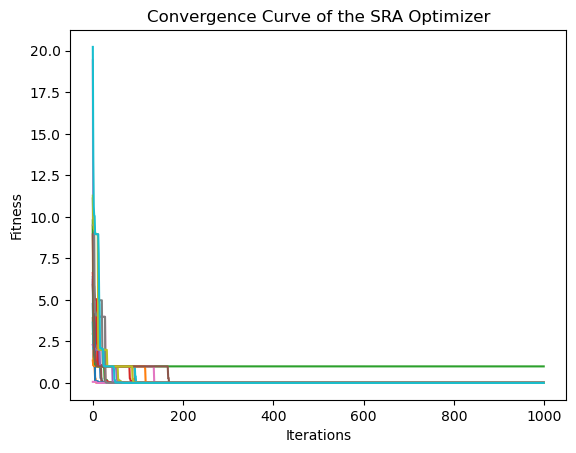

In [9]:
import matplotlib.pyplot as plt
def objective_Fun (x):
    return 20+x[0]**2-10.*np.cos(2*3.14159*x[0])+x[1]**2-10*np.cos(2*3.14159*x[1])
Max_iterations=1000  # Maximum Number of Iterations
swarm_size = 30 # Number of salps
LB=-10  #lower bound of solution
UB=10   #upper bound of solution
Dim=2 #problem dimensions
NoRuns=20  # Number of runs
ConvergenceCurve=np.zeros((Max_iterations,NoRuns))
for r in range(NoRuns):
    result = SRA(objective_Fun, LB, UB, Dim, swarm_size, Max_iterations)
    ConvergenceCurve[:,r]=result
# Plot the convergence curves of all runs
idx=range(Max_iterations)
fig= plt.figure()

#3-plot
ax=fig.add_subplot(111)
for i in range(NoRuns):
    ax.plot(idx,ConvergenceCurve[:,i])
plt.title('Convergence Curve of the SRA Optimizer', fontsize=12)
plt.ylabel('Fitness')
plt.xlabel('Iterations')
plt.show()